<a href="https://colab.research.google.com/github/NethmiMohotti/CobraShot/blob/DataScience/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.optimizers import *
from tensorflow.keras import *
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Input, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
train_path = '/content/drive/MyDrive/SDGP(Binary_Architects)23/Data Science/dataset/train'
test_path = '/content/drive/MyDrive/SDGP(Binary_Architects)23/Data Science/dataset/testing'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
from glob import glob
folders = glob("/content/drive/MyDrive/SDGP(Binary_Architects)23/Data Science/dataset/train/*")
print(len(folders))

7


In [9]:
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

testing_set = test_dataset.flow_from_directory(test_path, 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2485 images belonging to 7 classes.
Found 83 images belonging to 7 classes.


In [16]:
training_set.class_indices

{'Black rat snake': 0,
 'Common garter snake': 1,
 'Common watersnake': 2,
 "Russell's Viper": 3,
 'Saw-scaled Viper': 4,
 'Spectacled Cobra': 5,
 'Western diamondback rattlesnake': 6}

In [17]:
cobrashot_model = model.fit(
  training_set,
  validation_data=testing_set,
  epochs=35,
  batch_size=15
)

Epoch 1/35
78/78 [==============================] - 68s 768ms/step - loss: 1.6032 - accuracy: 0.4841 - val_loss: 1.0749 - val_accuracy: 0.5542
Epoch 2/35
78/78 [==============================] - 55s 710ms/step - loss: 0.9480 - accuracy: 0.6523 - val_loss: 0.9220 - val_accuracy: 0.6265
Epoch 3/35
78/78 [==============================] - 55s 701ms/step - loss: 0.8630 - accuracy: 0.6889 - val_loss: 1.2399 - val_accuracy: 0.6386
Epoch 4/35
78/78 [==============================] - 54s 691ms/step - loss: 0.7059 - accuracy: 0.7642 - val_loss: 0.9972 - val_accuracy: 0.6145
Epoch 5/35
78/78 [==============================] - 55s 702ms/step - loss: 0.6732 - accuracy: 0.7541 - val_loss: 0.9911 - val_accuracy: 0.6386
Epoch 6/35
78/78 [==============================] - 54s 689ms/step - loss: 0.5224 - accuracy: 0.8056 - val_loss: 0.8598 - val_accuracy: 0.7108
Epoch 7/35
78/78 [==============================] - 56s 716ms/step - loss: 0.5080 - accuracy: 0.8193 - val_loss: 0.8155 - val_accuracy: 0.6988

In [18]:
cobrashot_model.history??

In [19]:
cobrashot_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

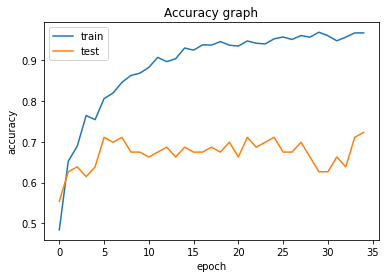

In [20]:
# summarize training for accuracy
plt.plot(cobrashot_model.history['accuracy'])
plt.plot(cobrashot_model.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

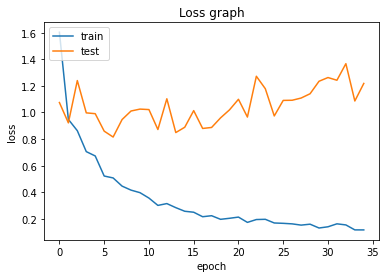

In [21]:
# summarize training for loss
plt.plot(cobrashot_model.history['loss'])
plt.plot(cobrashot_model.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [22]:
#create the model
from tensorflow.keras.models import load_model
model.save('cobrashot_model.h5')

In [23]:
#load the model and save
from keras.models import load_model
cobrashot_model = load_model('cobrashot_model.h5')